# Climate Change Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# Import Data

In [2]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

In [10]:
yearsBase

array([1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959.,
       1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968.,
       1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
       1978., 1979., 1980.])

In [11]:
meanBase 

array([-0.08, -0.08, -0.06, -0.1 , -0.09, -0.08, -0.04, -0.02,  0.04,
        0.04,  0.03, -0.03, -0.05, -0.08, -0.09, -0.11, -0.06, -0.01,
       -0.02, -0.02,  0.04,  0.03,  0.02, -0.  ,  0.04,  0.02,  0.07,
        0.13,  0.26,  0.24])

# Create a scatter plot

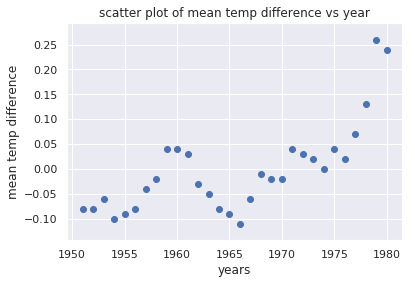

In [8]:
plt.scatter(yearsBase,meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference',fontsize=12)
plt.show()

The data set  uses a 30-year mean between 1951 and 1980 to calculate a base temperature for that period, and then uses 5-year mean temperatures to calculate the difference between the 5-year mean and the 30-year mean for each year. The scatter plot shows the annual temperature differences.

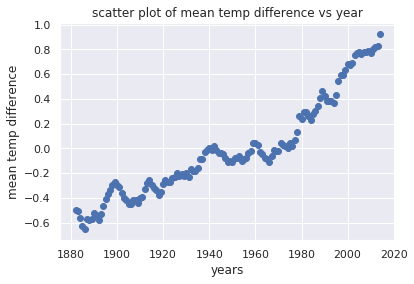

In [12]:
plt.scatter(years,mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference',fontsize=12)
plt.show()

The data set  uses a 140-year mean between 1880 and 2020 to calculate a temperature for that period, and then uses 20-year mean temperatures to calculate the difference between the 20-year mean and the 140-year mean for each year. The scatter plot shows the annual temperature differences.

# Linear Regression with Numpy

Showing trends in the temperature over the time.

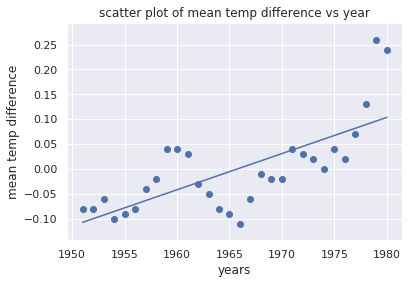

 y = 0.007279199110122221 * x + -14.309265850945222


In [13]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

From the regression line, we can see that the difference between 30-year mean temperatures and 5-year mean temperatures is increasing over time. Most of the computational work required to generate the regression line was done by NumPy's polyfit function, which computed the values of m and b in the equation y = mx + b.



# Linear Regression with Scikit Learn

compute a trend line for the NASA climate data.

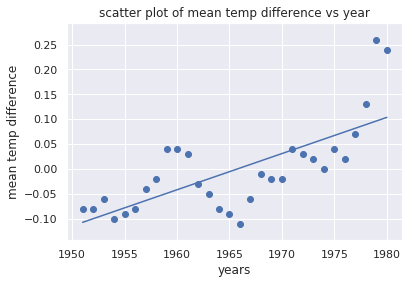

 y = 0.007279199110122357 * x + -14.309265850945492


In [14]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

# Analyze Data with Seaborn

Seaborn can create a regression line accompanied by a projection showing where data points should fall based on the regression with one simple function call.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


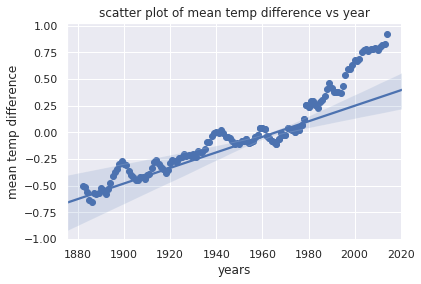

In [15]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()

scatter chart with a regression line and a visual representation of the range in which the data points are expected to fall.

Comparison of actual values and predicted values generated with Seaborn

Notice how the data points for the first 100 years conform nicely to the predicted values, but the data points from roughly 1980 forward don't. It's models such as these that lead scientists to believe that climate change is accelerating.